In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/210220/210220.csv


In [2]:
df=pd.read_csv("/kaggle/input/210220/210220.csv")
df.head()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,age,cho,hdl,ldl,...,ps,rccaimt,lccacl,rccact,rccacl,avr_imt,aip,Scorer,Framinghamr,target
0,0,1,0,0,3.0,3,74,2.63,1.60,1.33,...,0.15,0.10,0.00,0.06,0.39,0.10,-0.50,0.10,0.03,0
1,1,0,0,0,3.0,0,69,3.09,0.73,1.86,...,0.17,0.10,0.42,0.00,0.00,0.10,0.39,0.14,0.13,0
2,0,0,0,0,0.5,0,63,6.48,1.65,4.47,...,0.00,0.06,0.00,0.00,0.00,0.06,-0.23,0.03,0.03,0
3,0,1,0,0,3.0,0,63,5.96,1.50,4.59,...,0.71,0.10,0.97,0.58,2.30,0.10,-0.26,0.02,0.05,0
4,1,0,0,1,0.0,0,65,3.73,1.13,2.50,...,0.34,0.10,0.53,0.12,0.62,0.11,-0.03,0.18,0.20,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        1232 non-null   int64  
 1   hypertension  1232 non-null   int64  
 2   diabete       1232 non-null   int64  
 3   smokecurrent  1232 non-null   int64  
 4   hpgrade       1232 non-null   float64
 5   chestpain     1232 non-null   int64  
 6   age           1232 non-null   int64  
 7   cho           1232 non-null   float64
 8   hdl           1232 non-null   float64
 9   ldl           1232 non-null   float64
 10  crge          1232 non-null   float64
 11  sbp           1232 non-null   int64  
 12  height        1232 non-null   int64  
 13  nep           1232 non-null   float64
 14  ly            1232 non-null   float64
 15  mo            1232 non-null   float64
 16  mcvfl         1232 non-null   float64
 17  glu           1232 non-null   float64
 18  bun           1232 non-null 

In [4]:
df.isna().sum()

gender          0
hypertension    0
diabete         0
smokecurrent    0
hpgrade         0
chestpain       0
age             0
cho             0
hdl             0
ldl             0
crge            0
sbp             0
height          0
nep             0
ly              0
mo              0
mcvfl           0
glu             0
bun             0
ua              0
ckmb            0
fib             0
dd              0
lccaimt         0
lccact          0
lccach          0
rccach          0
max_ccach       0
max_ccacl       0
ps              0
rccaimt         0
lccacl          0
rccact          0
rccacl          0
avr_imt         0
aip             0
Scorer          0
Framinghamr     0
target          0
dtype: int64

### **Number of males and females whose heart data is stored in the dataset**

In [5]:
df.gender.value_counts()

1    772
0    460
Name: gender, dtype: int64

 ### **Count of the number of males and females who have heart disease**

In [6]:
df.gender[df.target==1].value_counts()

1    457
0    198
Name: gender, dtype: int64

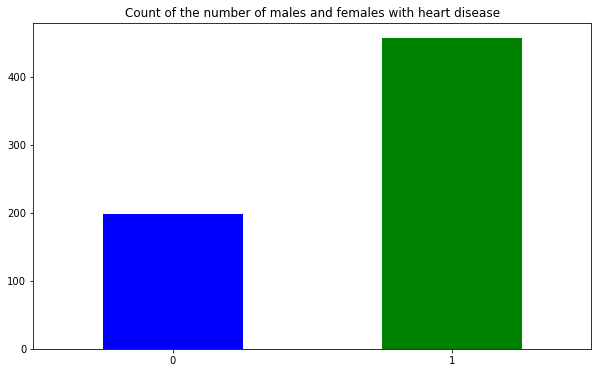

In [7]:
df.gender[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks(rotation=0);

In [8]:
pd.crosstab(df.target,df.gender)

gender,0,1
target,,
0,262,315
1,198,457


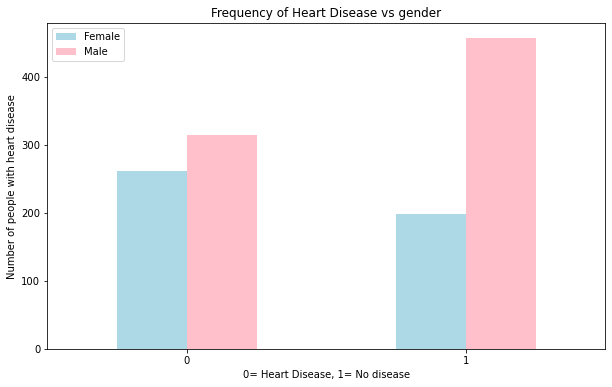

In [9]:
pd.crosstab(df.target,df.gender).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs gender")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## **Building a Correlation Matrix**

In [10]:
df.corr()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,age,cho,hdl,ldl,...,ps,rccaimt,lccacl,rccact,rccacl,avr_imt,aip,Scorer,Framinghamr,target
gender,1.000000,-0.061220,-0.003191,0.452276,-0.044109,0.057551,-0.194418,-0.212046,-0.313816,-0.131750,...,0.104528,0.023908,0.100245,0.082577,0.083215,0.050262,0.096413,0.237615,0.543516,0.156583
hypertension,-0.061220,1.000000,0.162865,-0.059217,0.868894,0.037014,0.191348,-0.006894,-0.020159,-0.016330,...,0.180231,0.153004,0.167071,0.132667,0.134038,0.160860,0.062210,0.059807,0.080871,0.145396
diabete,-0.003191,0.162865,1.000000,-0.002243,0.180171,0.086984,0.128281,0.008713,-0.045303,-0.003406,...,0.113741,0.087320,0.080577,0.066047,0.063883,0.100804,0.049517,0.257704,0.430046,0.217303
smokecurrent,0.452276,-0.059217,-0.002243,1.000000,-0.035172,0.033648,-0.222909,-0.058699,-0.196796,-0.016398,...,0.034044,0.000349,0.050812,0.066645,0.055271,0.004463,0.125607,0.309470,0.483640,0.084176
hpgrade,-0.044109,0.868894,0.180171,-0.035172,1.000000,0.049682,0.209058,-0.013608,-0.023127,-0.010184,...,0.197912,0.170995,0.192577,0.139542,0.144368,0.189621,0.062809,0.100523,0.116965,0.183805
chestpain,0.057551,0.037014,0.086984,0.033648,0.049682,1.000000,0.014314,-0.070330,-0.079556,-0.039750,...,0.072681,0.037058,0.082080,0.078121,0.061949,0.061310,0.056065,0.046273,0.099836,0.257962
age,-0.194418,0.191348,0.128281,-0.222909,0.209058,0.014314,1.000000,-0.045975,0.139278,-0.058524,...,0.308312,0.381125,0.246223,0.218455,0.244374,0.420916,-0.187738,0.379689,0.354759,0.241807
cho,-0.212046,-0.006894,0.008713,-0.058699,-0.013608,-0.070330,-0.045975,1.000000,0.355869,0.868449,...,-0.042665,-0.039148,-0.060473,-0.054670,-0.043428,-0.054580,0.149200,-0.115626,-0.112759,-0.107247
hdl,-0.313816,-0.020159,-0.045303,-0.196796,-0.023127,-0.079556,0.139278,0.355869,1.000000,0.179159,...,-0.044385,-0.051573,-0.057156,-0.074639,-0.076269,-0.057729,-0.593687,-0.047279,-0.313575,-0.130626
ldl,-0.131750,-0.016330,-0.003406,-0.016398,-0.010184,-0.039750,-0.058524,0.868449,0.179159,1.000000,...,-0.006647,-0.020396,-0.017644,-0.019740,-0.008960,-0.033059,0.030750,-0.080368,-0.040218,-0.076056


<AxesSubplot:>

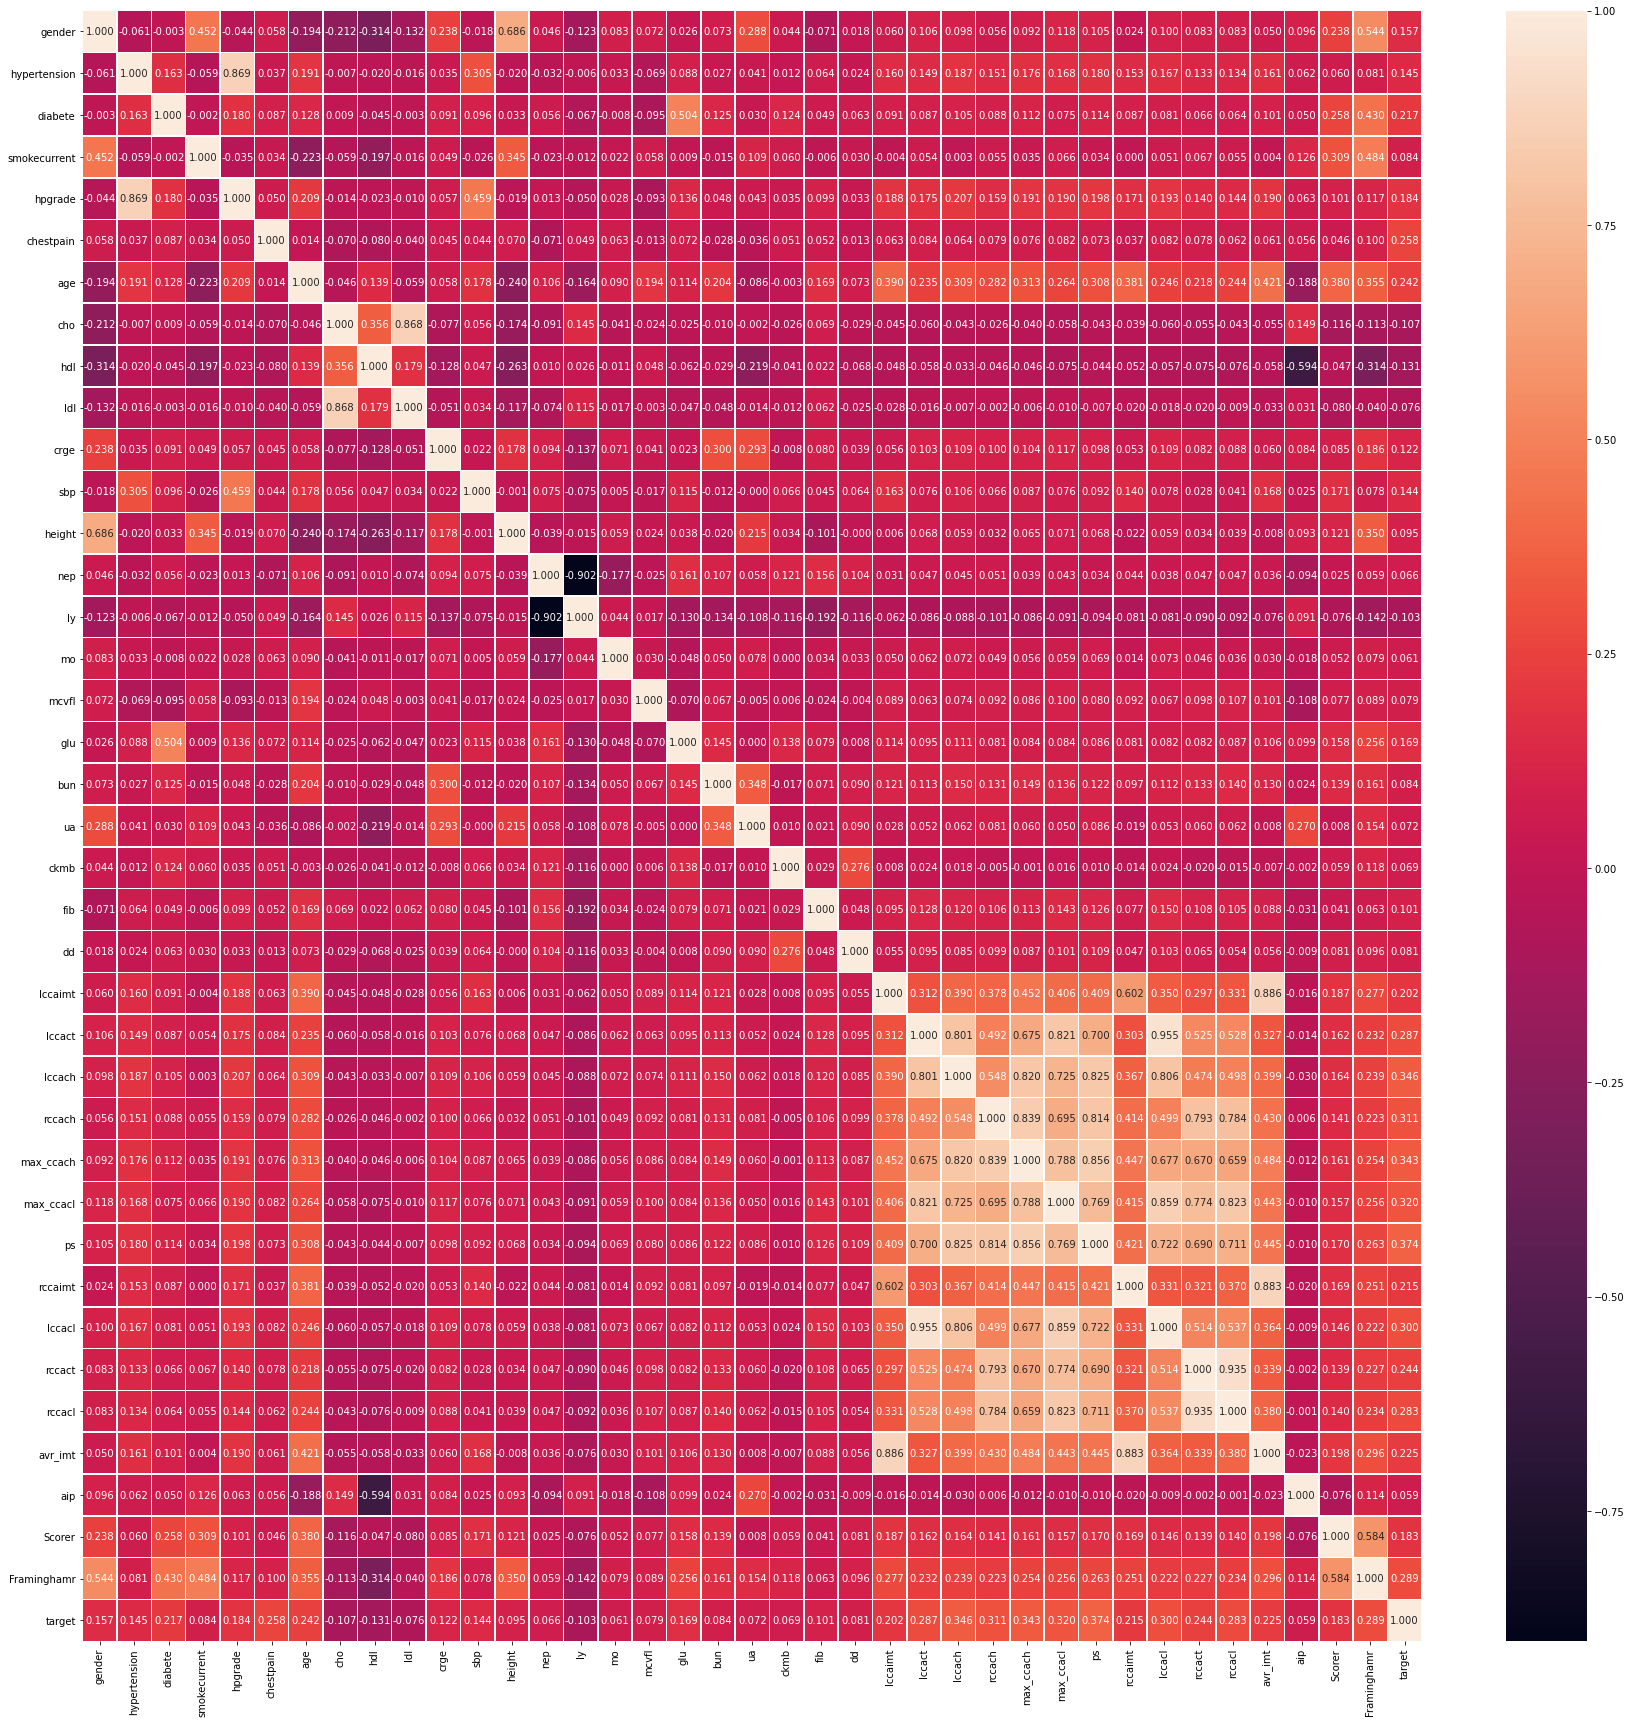

In [11]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


In [12]:
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 1232 datapoints in the dataset with 39 Features listed as ['gender' 'hypertension' 'diabete' 'smokecurrent' 'hpgrade' 'chestpain'
 'age' 'cho' 'hdl' 'ldl' 'crge' 'sbp' 'height' 'nep' 'ly' 'mo' 'mcvfl'
 'glu' 'bun' 'ua' 'ckmb' 'fib' 'dd' 'lccaimt' 'lccact' 'lccach' 'rccach'
 'max_ccach' 'max_ccacl' 'ps' 'rccaimt' 'lccacl' 'rccact' 'rccacl'
 'avr_imt' 'aip' 'Scorer' 'Framinghamr' 'target']:


In [13]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade' ,'chestpain'
 ,'age' ,'cho' ,'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep', 'ly' ,'mo', 'mcvfl'
 ,'glu' ,'bun', 'ua', 'ckmb', 'fib' ,'dd', 'lccaimt', 'lccact', 'lccach' ,'rccach'
 ,'max_ccach', 'max_ccacl', 'ps' ,'rccaimt', 'lccacl', 'rccact', 'rccacl'
 ,'avr_imt', 'aip' ,'Scorer', 'Framinghamr' ]
df[feat] = scal.fit_transform(df[feat])
df.head()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,age,cho,hdl,ldl,...,ps,rccaimt,lccacl,rccact,rccacl,avr_imt,aip,Scorer,Framinghamr,target
0,0.0,1.0,0.0,0.0,1.000000,1.0,0.773585,0.196552,0.466899,0.208403,...,0.076923,0.714286,0.000000,0.042857,0.101036,0.6,0.073171,0.022883,0.045455,0
1,1.0,0.0,0.0,0.0,1.000000,0.0,0.679245,0.275862,0.163763,0.297479,...,0.087179,0.714286,0.104738,0.000000,0.000000,0.6,0.507317,0.032037,0.272727,0
2,0.0,0.0,0.0,0.0,0.166667,0.0,0.566038,0.860345,0.484321,0.736134,...,0.000000,0.428571,0.000000,0.000000,0.000000,0.2,0.204878,0.006865,0.045455,0
3,0.0,1.0,0.0,0.0,1.000000,0.0,0.566038,0.770690,0.432056,0.756303,...,0.364103,0.714286,0.241895,0.414286,0.595855,0.6,0.190244,0.004577,0.090909,0
4,1.0,0.0,0.0,1.0,0.000000,0.0,0.603774,0.386207,0.303136,0.405042,...,0.174359,0.714286,0.132170,0.085714,0.160622,0.7,0.302439,0.041190,0.431818,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade' ,'chestpain'
 ,'age' ,'cho' ,'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep', 'ly' ,'mo', 'mcvfl'
 ,'glu' ,'bun', 'ua', 'ckmb', 'fib' ,'dd', 'lccaimt', 'lccact', 'lccach' ,'rccach'
 ,'max_ccach', 'max_ccacl', 'ps' ,'rccaimt', 'lccacl', 'rccact', 'rccacl'
 ,'avr_imt', 'aip' ,'Scorer', 'Framinghamr' ]
df[features] = scaler.fit_transform(df[features])
df.head()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,age,cho,hdl,ldl,...,ps,rccaimt,lccacl,rccact,rccacl,avr_imt,aip,Scorer,Framinghamr,target
0,-1.295477,1.009788,-0.44939,-0.619895,1.231688,1.155470,1.231548,-1.166051,1.435790,-1.068406,...,-0.259267,0.274273,-0.668777,-0.180952,0.002998,0.110026,-2.248691,-0.131256,-1.052088,0
1,0.771916,-0.990307,-0.44939,-0.619895,1.231688,-1.547452,0.730932,-0.710385,-1.321272,-0.472394,...,-0.181964,0.274273,0.008720,-0.536034,-0.643012,0.110026,0.729285,0.064812,0.479669,0
2,-1.295477,-0.990307,-0.44939,-0.619895,-0.870611,-1.547452,0.130193,2.647672,1.594242,2.462686,...,-0.839040,-2.008862,-0.668777,-0.536034,-0.643012,-2.447549,-1.345260,-0.474376,-1.052088,0
3,-1.295477,1.009788,-0.44939,-0.619895,1.231688,-1.547452,0.130193,2.132572,1.118886,2.597632,...,1.905221,0.274273,0.895919,2.896429,3.166791,0.110026,-1.445641,-0.523393,-0.745737,0
4,0.771916,-0.990307,-0.44939,1.613177,-1.291071,-1.547452,0.330439,-0.076416,-0.053658,0.247319,...,0.475113,0.274273,0.186160,0.174131,0.383979,0.749419,-0.676052,0.260881,1.551898,0


## **Creating Features and Target variable**

In [15]:
df2 = pd.read_csv('/kaggle/input/210220/210220.csv')

df2.columns

Index(['gender', 'hypertension', 'diabete', 'smokecurrent', 'hpgrade',
       'chestpain', 'age', 'cho', 'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep',
       'ly', 'mo', 'mcvfl', 'glu', 'bun', 'ua', 'ckmb', 'fib', 'dd', 'lccaimt',
       'lccact', 'lccach', 'rccach', 'max_ccach', 'max_ccacl', 'ps', 'rccaimt',
       'lccacl', 'rccact', 'rccacl', 'avr_imt', 'aip', 'Scorer', 'Framinghamr',
       'target'],
      dtype='object')

In [16]:
# Dropping columns education and glucose
df = df2.drop([ 'cho', 'hdl', 'ldl', 'crge', 'sbp', 'height', 'nep',
       'ly', 'mo', 'mcvfl', 'glu', 'bun', 'ua', 'ckmb', 'fib', 'dd', 'lccaimt',
       'lccact', 'lccach',   'rccaimt',
       'lccacl', 'rccact', 'rccacl', 'avr_imt', 'aip', 'Scorer', 'Framinghamr'], axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['diabete',
 'max_ccacl',
 'ps',
 'chestpain',
 'max_ccach',
 'rccach',
 'hypertension',
 'hpgrade',
 'gender',
 'smokecurrent']
df[feat] = scal.fit_transform(df[feat])
df.head()

,gender,hypertension,diabete,smokecurrent,hpgrade,chestpain,age,rccach,max_ccach,max_ccacl,ps,target
0,0.0,1.0,0.0,0.0,1.000000,1.0,74,0.141509,0.141509,0.097257,0.076923,0
1,1.0,0.0,0.0,0.0,1.000000,0.0,69,0.000000,0.160377,0.104738,0.087179,0
2,0.0,0.0,0.0,0.0,0.166667,0.0,63,0.000000,0.000000,0.000000,0.000000,0
3,0.0,1.0,0.0,0.0,1.000000,0.0,63,0.235849,0.235849,0.573566,0.364103,0
4,1.0,0.0,0.0,1.0,0.000000,0.0,65,0.179245,0.179245,0.154613,0.174359,0


In [18]:
X=df.drop("target",axis=1).values
Y=df.target.values

## **Splitting the data into train and test sets**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=300,test_size=0.35)

## **Create a function for evaluating metrics**

In [20]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

## **Fitting and Comparing different Models**

In [21]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.662, 'recall': 0.69, 'F1 score': 0.687}


In [22]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.75, 'recall': 0.746, 'F1 score': 0.762}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.771, 'recall': 0.789, 'F1 score': 0.787}


In [24]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.616, 'recall': 0.793, 'F1 score': 0.689}


In [25]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:19:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.745, 'recall': 0.741, 'F1 score': 0.758}


In [26]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,75.000000
1,Random Forest,77.083333
2,K-Nearest Neighbour,66.203704
3,Support Vector Machine,61.574074
4,XGBoost,74.537037


## **Tuning KNN**

In [27]:
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 0.5972222222222222%
Accuracy with 2 no. of neighbors: 0.5555555555555556%
Accuracy with 3 no. of neighbors: 0.6319444444444444%
Accuracy with 4 no. of neighbors: 0.6203703703703703%
Accuracy with 5 no. of neighbors: 0.6620370370370371%
Accuracy with 6 no. of neighbors: 0.6597222222222222%
Accuracy with 7 no. of neighbors: 0.6898148148148148%
Accuracy with 8 no. of neighbors: 0.6875%
Accuracy with 9 no. of neighbors: 0.7013888888888888%
Accuracy with 10 no. of neighbors: 0.6944444444444444%
Accuracy with 11 no. of neighbors: 0.7106481481481481%
Accuracy with 12 no. of neighbors: 0.6875%
Accuracy with 13 no. of neighbors: 0.6921296296296297%
Accuracy with 14 no. of neighbors: 0.6851851851851852%
Accuracy with 15 no. of neighbors: 0.6805555555555556%
Accuracy with 16 no. of neighbors: 0.6921296296296297%
Accuracy with 17 no. of neighbors: 0.6875%
Accuracy with 18 no. of neighbors: 0.6851851851851852%
Accuracy with 19 no. of neighbors: 0.6828703703703703%


In [28]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.69, 'recall': 0.728, 'F1 score': 0.716}


# **Tuning Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,Y_train)
  print(f"Accuracy: {clf2.score(X_test,Y_test)*100:2f}%")

With 10 estimators:
Accuracy: 69.675926%
With 20 estimators:
Accuracy: 76.157407%
With 30 estimators:
Accuracy: 74.074074%
With 40 estimators:
Accuracy: 75.694444%
With 50 estimators:
Accuracy: 77.083333%
With 60 estimators:
Accuracy: 77.083333%
With 70 estimators:
Accuracy: 77.083333%
With 80 estimators:
Accuracy: 77.777778%
With 90 estimators:
Accuracy: 76.851852%
With 100 estimators:
Accuracy: 78.240741%
With 110 estimators:
Accuracy: 77.546296%
With 120 estimators:
Accuracy: 76.157407%
With 130 estimators:
Accuracy: 78.240741%
With 140 estimators:
Accuracy: 77.314815%
With 150 estimators:
Accuracy: 77.314815%
With 160 estimators:
Accuracy: 77.083333%
With 170 estimators:
Accuracy: 77.777778%
With 180 estimators:
Accuracy: 78.009259%
With 190 estimators:
Accuracy: 76.157407%
With 200 estimators:
Accuracy: 77.083333%
With 210 estimators:
Accuracy: 76.388889%
With 220 estimators:
Accuracy: 76.157407%
With 230 estimators:
Accuracy: 78.009259%
With 240 estimators:
Accuracy: 77.083333%
W

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf2.fit(X_train,Y_train)
RF2_acc_score=RF_clf2.score(X_test,Y_test)
RF2_Y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)
evaluation(Y_test,RF2_Y_pred)

{'accuracy': 0.741, 'recall': 0.741, 'F1 score': 0.754}


# **Tuning XGBoost manually**

In [31]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

[14:19:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.745, 'recall': 0.741, 'F1 score': 0.758}


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# **Hyper parameter tuning  SVC using GridSearchCV**

In [32]:

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.675, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.700, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.613, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.675, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.0min finished


# **Hyper parameter tuning KNN using GridSearchCV**

In [33]:
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score:67.36111111111111%


[Parallel(n_jobs=1)]: Done 7105 out of 7105 | elapsed:  1.1min finished


In [34]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,75.000000
1,Random Forest,74.074074
2,K-Nearest Neighbour,68.981481
3,Support Vector Machine,61.574074
4,Extreme Gradient Boost,74.537037


# **Trying StackingCV Classifier**

In [35]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,Knn_clf,RF_clf2],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
#print(SVC_score)
evaluation(Y_test,scv_Y_pred)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.75, 'recall': 0.733, 'F1 score': 0.759}


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost', 'StackingCV Classifier'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100, scv_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,75.000000
1,Random Forest,74.074074
2,K-Nearest Neighbour,68.981481
3,Support Vector Machine,61.574074
4,Extreme Gradient Boost,74.537037
5,StackingCV Classifier,75.000000


# **Looking at the evaluation metrics for our best model**

As we can see, the StackingCV Classifier gives us an accuracy of 92%. 

Let us evaluate the model now.

In [37]:
print(" Best evaluation parameters achieved with KNN:") 
evaluation(Y_test,scv_Y_pred)

 Best evaluation parameters achieved with KNN:
{'accuracy': 0.75, 'recall': 0.733, 'F1 score': 0.759}


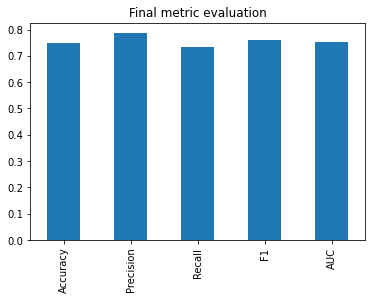

In [38]:
final_metrics={'Accuracy': scv.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,scv_Y_pred),
                   'Recall': recall_score(Y_test,scv_Y_pred),
                   'F1': f1_score(Y_test,scv_Y_pred),
                   'AUC': roc_auc_score(Y_test,scv_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

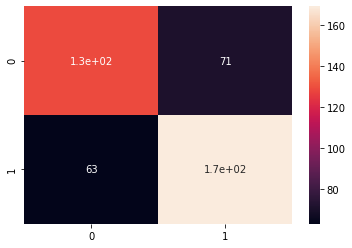

In [39]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,Knn_Y_pred),annot=True,cbar=True);

In [40]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
  print("Warning! You have  a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.


# **Let's save our model using pickle**

In [41]:
import pickle as pkl
pkl.dump(Knn_clf,open("final_model.p","wb"))

In [42]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.23.2


# **Import streamlit,pyngrok, and ngrok modules**

In [1]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

You should consider upgrading via the 'd:\python39\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'd:\python39\python.exe -m pip install --upgrade pip' command.


# **Write a file for creating web app**

In [2]:
%%writefile heart_app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.p","rb"))








st.set_page_config(page_title="Coronary Heart disease diagnosis App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps ):   
 
    
    # Pre-processing user input   
    if gender=="male":
        gender=1 
    else: gender=0
    
    
    if chestpain=="Typical angina":
        chestpain=3
    elif chestpain=="Atypical angina":
        chestpain=2
    elif chestpain=="Non-anginal pain":
        chestpain=1
    elif chestpain=="Asymptomatic":
        chestpain=0
    
    if hypertension=="Yes":
        hypertension=1
    elif hypertension=="No":
        hypertension=0
        
    if hpgrade=="level 3":
        hpgrade=3
    elif hpgrade=="level 2":
        hpgrade=2
    elif hpgrade=="level 1":
        hpgrade=1
    elif hpgrade=="prehypertension":
        hpgrade=0.5
    elif hpgrade=="normal":
        hpgrade=0
        
    if diabete=="Yes":
        diabete=1
    elif diabete=="No":
        diabete=0
 
    if smokecurrent=="Yes":
        smokecurrent=1
    elif smokecurrent=="No":
        smokecurrent=0



    user_input=[gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Coronary Heart disease diagnosis App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Bao xin ')


# following lines create boxes in which user can enter data required to make prediction

gender = st.radio("Select Gender: ", ('male', 'female'))
chestpain = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
hypertension=st.selectbox('hypertension',['Yes','No'])
hpgrade = st.selectbox('hygrade',("level 3","level 2","level 1","prehypertension","normal")) 
diabete=st.selectbox('diabete',['Yes','No'])
smokecurrent=st.selectbox('smokecurrent',['Yes','No'])
max_ccach=st.number_input('The maximum double carotid plaque height')
max_ccacl=st.number_input('The maximum double carotid plaque length')
rccach=st.number_input('right carotid plaque height')
ps=st.number_input('The addition of double carotid plaque height')



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(gender, hypertension, diabete, smokecurrent, hpgrade,chestpain, rccach, max_ccach, max_ccacl, ps)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of a coronary heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a heart disease")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 


    
    
    
    
    
    
    
    

Writing heart_app.py


In [3]:
!nohup streamlit run d:\python39\lib\site-packages\ipykernel_launcher.py & 
url = ngrok.connect(port='6501')
url

OSError: Background processes not supported.